In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import math

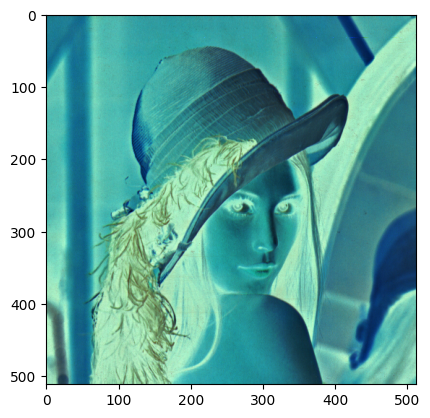

In [5]:
# converte para negativo
img_path = 'imagens/Lenna.png'
img = cv2.imread(img_path)
img_negativa = np.copy(img)

img_negativa[:, :] = 255 - img[:, :]
plt.imshow(cv2.cvtColor(img_negativa, cv2.COLOR_BGR2RGB))
plt.show()


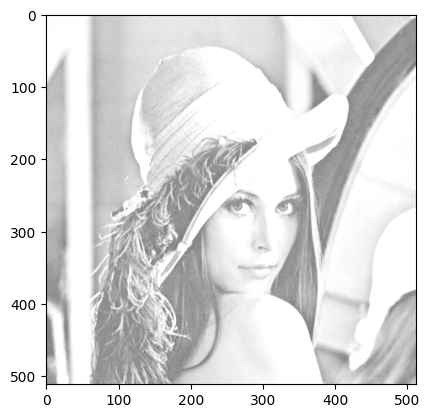

In [7]:
# brilho
img_path = 'imagens/Lenna.png'
img = cv2.imread(img_path)
img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_brilho = np.copy(img_gray)

img_brilho[:, :] = cv2.add(img_gray, 100)
plt.imshow(cv2.cvtColor(img_brilho, cv2.COLOR_BGR2RGB))
plt.show()


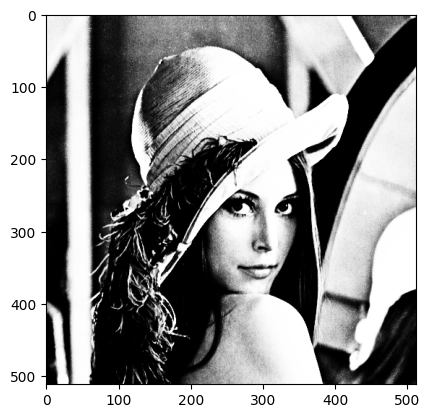

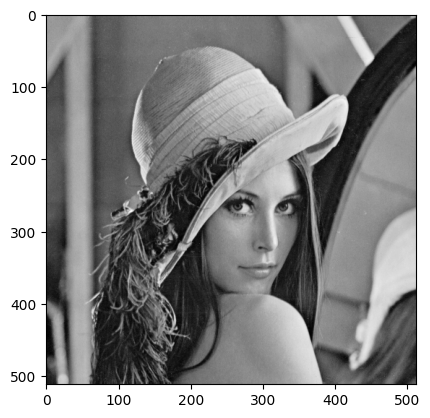

In [19]:
# contraste

def alarga_contraste(img, K, r0):
    img_contraste = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r = np.float16(img[i, j])
            img_contraste[i, j] = 255/(1 + np.exp(-K*(r - r0)))
    return img_contraste

img_path = 'imagens/Lenna.png'
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_contraste = alarga_contraste(img_gray, 0.1, 128)

plt.imshow(img_contraste, cmap='gray')
plt.show()
plt.imshow(img_gray, cmap='gray')
plt.show()

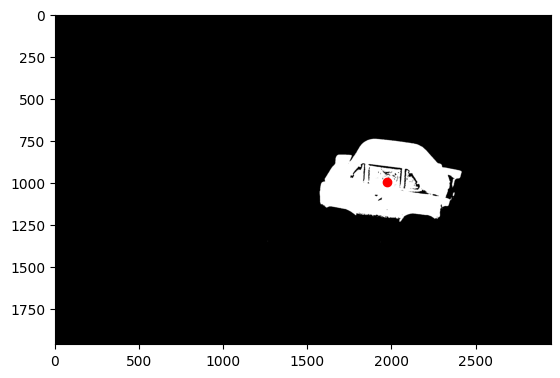

In [43]:
# thresholding

def thresholding(img, cor_inicio, intervalo):
    img_nova = np.zeros_like(img)
    cor_inicio = np.array(cor_inicio)
    img_nova = cv2.inRange(img, cor_inicio - intervalo, cor_inicio + intervalo)

    return img_nova

def center_mass(img):
    sx, sy = 0, 0
    cont = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] == 255:
                sx += i
                sy += j
                cont += 1
    cx = sx/cont
    cy = sy/cont

    return cx, cy

img_path = 'imagens/carrinho.jpg'
img = cv2.imread(img_path)
# cor BGR
cor_inicio = [227, 232, 204]
imagem_nova = thresholding(img, cor_inicio, 60)
cx, cy = center_mass(imagem_nova)

plt.plot(cy, cx, 'ro')
plt.imshow(imagem_nova, cmap='gray')
plt.show()



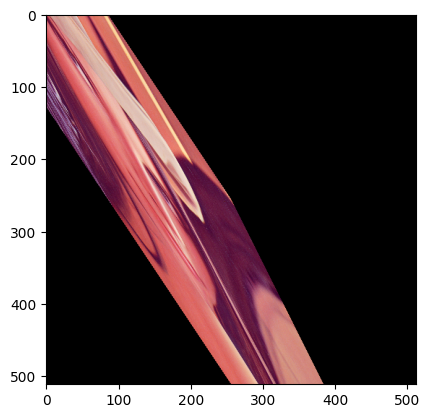

In [3]:
def warp_afim(img, A, b):
    img_warp = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            coord = np.array([[i], [j]])
            a_inv = np.linalg.inv(A)
            nova_coord = a_inv@coord - b
            x = int(round(nova_coord[0, 0]))
            y = int(round(nova_coord[1, 0]))

            if y >= 0 and y < img.shape[0] and x >= 0 and x < img.shape[1]:
                img_warp[i, j] = img[x, y]
    
    return img_warp

img_path = 'imagens/Lenna.png'
img = cv2.imread(img_path)
A = np.array([[2, 3], [1, 2]])
b = np.array([[-255], [-256]])
img_warp = warp_afim(img, A, b)

plt.imshow(cv2.cvtColor(img_warp, cv2.COLOR_BGR2RGB))
plt.show()